In [365]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [366]:
data = pd.read_csv("../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [367]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Exploratory Data Analysis

In [368]:
data.drop('customerID', axis='columns', inplace=True)

In [369]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [370]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [371]:
data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [372]:
pd.to_numeric(data.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [373]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [374]:
data.shape

(7043, 20)

In [375]:
data.iloc[488]['TotalCharges']

' '

In [376]:
new_data = data[data.TotalCharges!= ' ']
new_data.shape

(7032, 20)

In [377]:
new_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [378]:
new_data.TotalCharges = pd.to_numeric(new_data.TotalCharges)

/var/folders/h5/x30m0dg90wlfdhdlz31t7jwr0000gn/T/ipykernel_48991/1985949721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.TotalCharges = pd.to_numeric(new_data.TotalCharges)


In [379]:
new_data.TotalCharges.dtypes

dtype('float64')

Data Visualization

In [380]:
tenure_churn_no = new_data[new_data.Churn=='No'].tenure
tenure_churn_yes = new_data[new_data.Churn=='Yes'].tenure

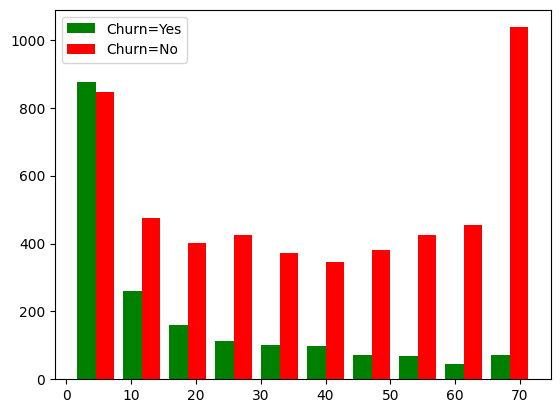

In [381]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()

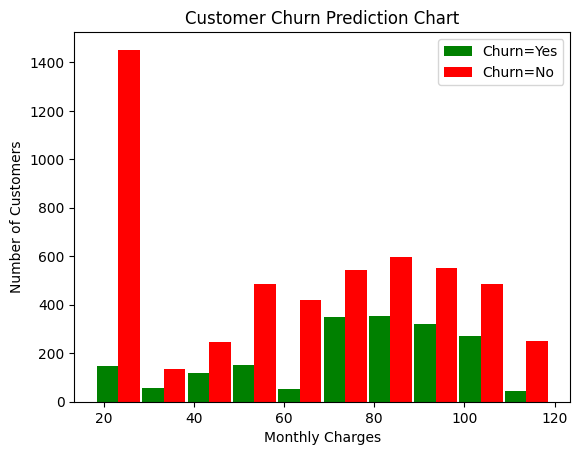

In [382]:
mc_churn_no = new_data[new_data.Churn=='No'].MonthlyCharges
mc_churn_yes = new_data[new_data.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction Chart")

blood_sugar_men = [112, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

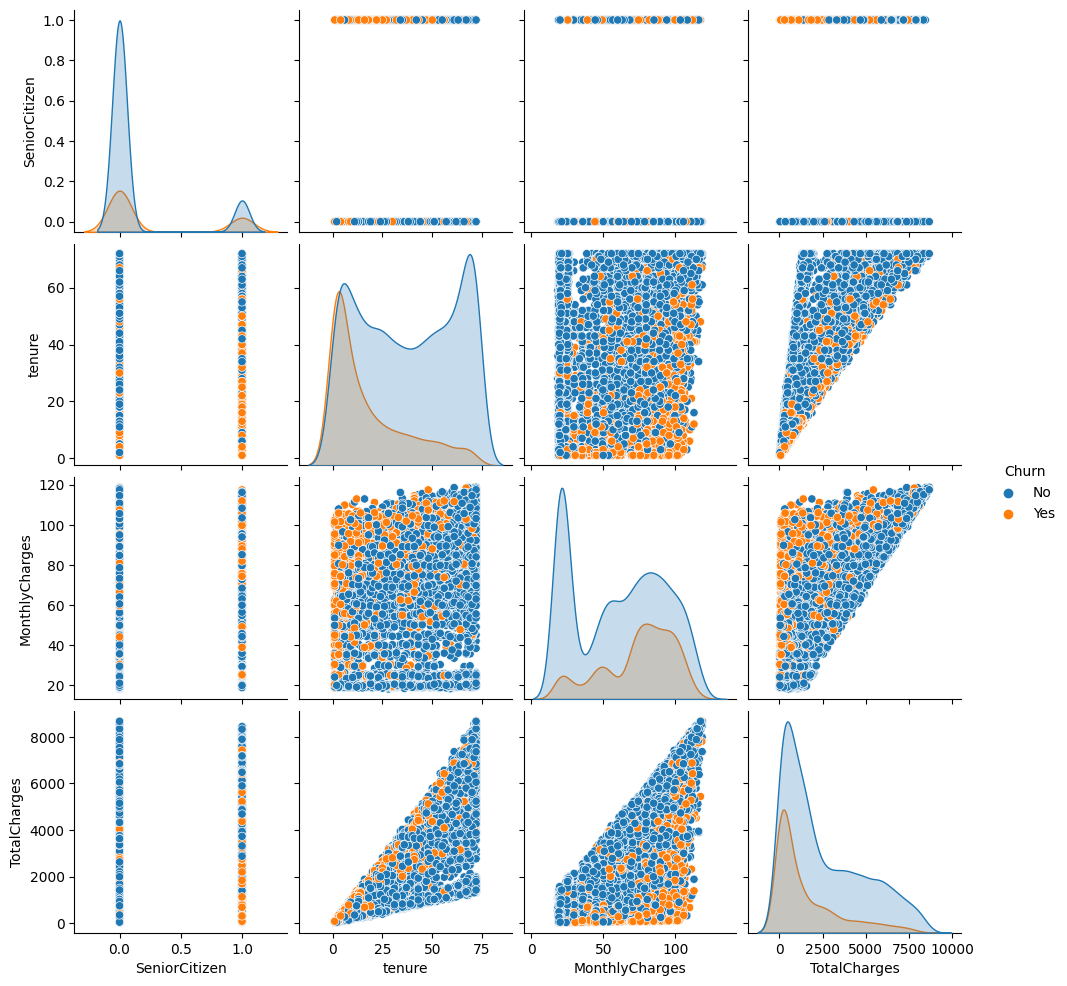

In [383]:
sns.pairplot(new_data, hue='Churn')

Data Preprocessing

In [384]:
def unique_col_val(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [385]:
unique_col_val(new_data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [386]:
new_data.replace('No internet service', 'No', inplace=True)
new_data.replace('No phone service', 'No', inplace=True)

/var/folders/h5/x30m0dg90wlfdhdlz31t7jwr0000gn/T/ipykernel_48991/622801591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace('No internet service', 'No', inplace=True)
/var/folders/h5/x30m0dg90wlfdhdlz31t7jwr0000gn/T/ipykernel_48991/622801591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace('No phone service', 'No', inplace=True)


In [387]:
unique_col_val(new_data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [388]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'PaperlessBilling', 'Churn']

In [389]:
for col in yes_no_columns:
    new_data[col].replace({'Yes':1, 'No':0}, inplace=True)

/var/folders/h5/x30m0dg90wlfdhdlz31t7jwr0000gn/T/ipykernel_48991/959070547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col].replace({'Yes':1, 'No':0}, inplace=True)


In [390]:
unique_col_val(new_data)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [391]:
new_data['gender'].replace({'Female':1, 'Male': 0}, inplace=True)

/var/folders/h5/x30m0dg90wlfdhdlz31t7jwr0000gn/T/ipykernel_48991/487063597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['gender'].replace({'Female':1, 'Male': 0}, inplace=True)


In [392]:
new_data['gender'].unique()

array([1, 0])

In [393]:
unique_col_val(new_data)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [394]:
# One Hot Encoding
new_data_2 = pd.get_dummies(data=new_data, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)
new_data_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [395]:
new_data_2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

Scaling

In [396]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
new_data_2[cols_to_scale] = scaler.fit_transform(new_data_2[cols_to_scale])

In [397]:
new_data_2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1154,1,0,1,1,0.619718,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7033,0,0,0,0,0.521127,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5043,0,1,0,0,0.253521,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0


Train Test Split

In [398]:
x = new_data_2.drop('Churn', axis='columns')
y = new_data_2["Churn"]

In [399]:
from sklearn.model_selection import train_test_split

In [400]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [401]:
x_train.shape

(5625, 26)

In [402]:
x_test.shape

(1407, 26)

In [404]:
len(x_train.columns)

26

Neural Network Construction

In [412]:
model = Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'), # Hidden Layer
    keras.layers.Dense(1, activation = 'sigmoid') # Output Layer
])

In [413]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [414]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 467us/step - loss: 0.5392 - accuracy: 0.7172
Epoch 2/100
176/176 [==============================] - 0s 457us/step - loss: 0.4366 - accuracy: 0.7840
Epoch 3/100
176/176 [==============================] - 0s 514us/step - loss: 0.4243 - accuracy: 0.7945
Epoch 4/100
176/176 [==============================] - 0s 459us/step - loss: 0.4194 - accuracy: 0.7963
Epoch 5/100
176/176 [==============================] - 0s 464us/step - loss: 0.4150 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 0s 473us/step - loss: 0.4117 - accuracy: 0.8027
Epoch 7/100
176/176 [==============================] - 0s 500us/step - loss: 0.4101 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 0s 466us/step - loss: 0.4076 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 0s 488us/step - loss: 0.4058 - accuracy: 0.8055
Epoch 10/100
176/176 [==============================] - 0s 656us/step - l

In [415]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 437us/step - loss: 0.4813 - accuracy: 0.7704


[0.48126542568206787, 0.7704335451126099]

In [417]:
y_pred = model.predict(x_test)
y_pred[:5]

44/44 [==============================] - 0s 486us/step


array([[0.23815668],
       [0.47744063],
       [0.03350124],
       [0.8258422 ],
       [0.34752354]], dtype=float32)